In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# % of missing values in Age column
(177/891)*100

19.865319865319865

In [5]:
# % of missing values in Cabin column
(687/891)*100

77.10437710437711

For the Age column we can replace the missing values with median or mode of that column. And as for the Cabin column, we can drop the entire column as there are very high % of missing values in it.

In [6]:
# drop Cabin column
df.drop(labels='Cabin',axis=1, inplace=True)

In [7]:
# fill the NaN values with median of Age column
df['Age'].fillna(value=df['Age'].median(), inplace=True)

In [8]:
# drop the two rows where NaN values are present in Embarked column
df.dropna(axis=0, inplace=True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# Check dupliactes
df.duplicated().sum()

np.int64(0)

# **EDA**

In [11]:
#Descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [13]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [15]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
# Encode the values in columns Sex and Embarked
df['Sex'].replace({'female':0, 'male':1}, inplace=True)


df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)


In [17]:
# Change the decimal values < 1 in Age to NaN and remove those rows

df.loc[df['Age'] < 1, 'Age'] = np.nan

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            7
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,445.126984,0.377551,2.311791,0.648526,29.541950,0.520408,0.375283,32.055687,0.361678
std,256.763846,0.485049,0.835681,0.477702,12.783114,1.105210,0.804909,49.716175,0.637127
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,444.500000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,666.750000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [21]:
# Drop columns Name and Ticket as they are not useful in analysis
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


# **Model Building**

In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
x = df.drop(columns='Survived')
y = df['Survived']

xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=1)

## LGBM

In [25]:
import lightgbm as lgb

In [26]:
# Create a dataset for LightGBM
train_data = lgb.Dataset(xtrain, label=ytrain)
test_data = lgb.Dataset(xtest, label=ytest, reference=train_data)

In [27]:
# Set parameters
params = {
    'objective': 'binary',       # For binary classification
    'metric': 'binary_logloss',  # Evaluation metric
    'boosting_type': 'gbdt',     # Gradient boosting decision tree
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': 1 
}

In [28]:
# Train the model
model = lgb.train(
    params,
    train_set=train_data,
    num_boost_round=1000,            # Maximum number of boosting iterations
    valid_sets=[test_data],         # Validation data to monitor performance
    valid_names=['validation'],      # Name for the validation set
    callbacks=[lgb.early_stopping(stopping_rounds=10)],  # Early stopping callback
)


[LightGBM] [Info] Number of positive: 266, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 705, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377305 -> initscore=-0.501003
[LightGBM] [Info] Start training from score -0.501003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [29]:
# check predictions
ypred = model.predict(xtest)

# Convert all values into binary
ypred = np.where(ypred > 0.5, 1, 0)

In [30]:
ypred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

In [31]:
# Import evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [32]:
classification_report(ytest,(ypred))

'              precision    recall  f1-score   support\n\n           0       0.83      0.89      0.86       110\n           1       0.80      0.70      0.75        67\n\n    accuracy                           0.82       177\n   macro avg       0.81      0.80      0.80       177\nweighted avg       0.82      0.82      0.82       177\n'

In [33]:
accuracy_score(ytest,ypred)

0.8192090395480226

## XGBM

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier as xgbc

In [38]:
# Set parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100
}

In [48]:
# Train the model
model = xgbc().fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(f'Train accuracy: {model.score(xtrain,ytrain)}')
print(f'Train accuracy: {model.score(xtest,ytest)}')

Train accuracy: 0.9985815602836879
Train accuracy: 0.8135593220338984


In [49]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85       110\n           1       0.76      0.75      0.75        67\n\n    accuracy                           0.81       177\n   macro avg       0.80      0.80      0.80       177\nweighted avg       0.81      0.81      0.81       177\n'

In [50]:
accuracy_score(ytest,ypred)

0.8135593220338984

In [53]:
Accuracy_report = pd.DataFrame({
    'Type of Boosting':['LGBM','XGBM'],
    'Precision':[0.83,0.85,],
    'Recall':[0.89,0.85,],
    'f1-score':[0.86,0.85,],
    'Accuracy':[0.82, 0.81,]}
                              )

Accuracy_report

,Type of Boosting,Precision,Recall,f1-score,Accuracy
0,LGBM,0.83,0.89,0.86,0.82
1,XGBM,0.85,0.85,0.85,0.81


In [54]:
import seaborn as sns

<Axes: xlabel='Type of Boosting', ylabel='Precision'>

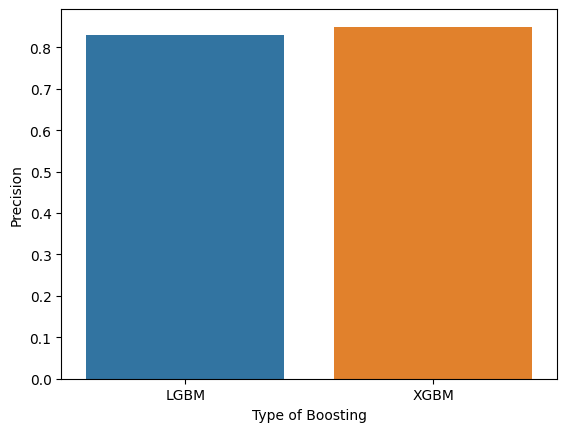

In [63]:
sns.barplot(x='Type of Boosting', y='Precision', hue='Type of Boosting', data=Accuracy_report)

<Axes: xlabel='Type of Boosting', ylabel='Recall'>

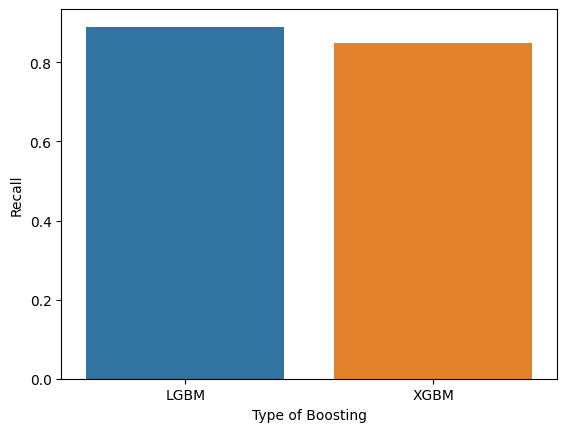

In [64]:
sns.barplot(x='Type of Boosting', y='Recall', hue='Type of Boosting', data=Accuracy_report)

<Axes: xlabel='Type of Boosting', ylabel='f1-score'>

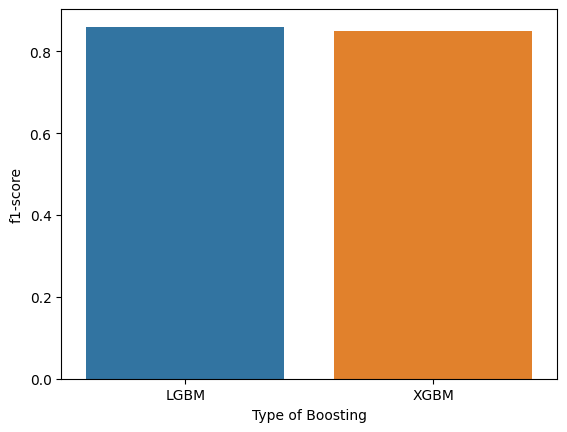

In [65]:
sns.barplot(x='Type of Boosting', y='f1-score', hue='Type of Boosting', data=Accuracy_report)

<Axes: xlabel='Type of Boosting', ylabel='Accuracy'>

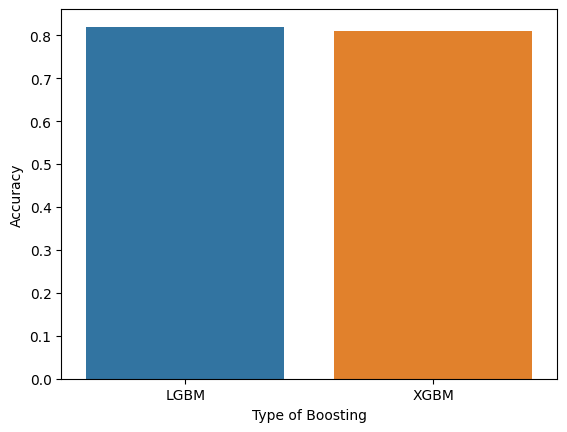

In [66]:
sns.barplot(x='Type of Boosting', y='Accuracy', hue='Type of Boosting', data=Accuracy_report)

Here are the points to note:
1. XGBM slightly outperforms LGBM in precision, which means its better at avoiding fales positives.
2. LGBM has better recall, which indicates its better at identifying all True positives.
3. Overall the f1-score is higher for LGBM indicating a better balance of precision and recall.